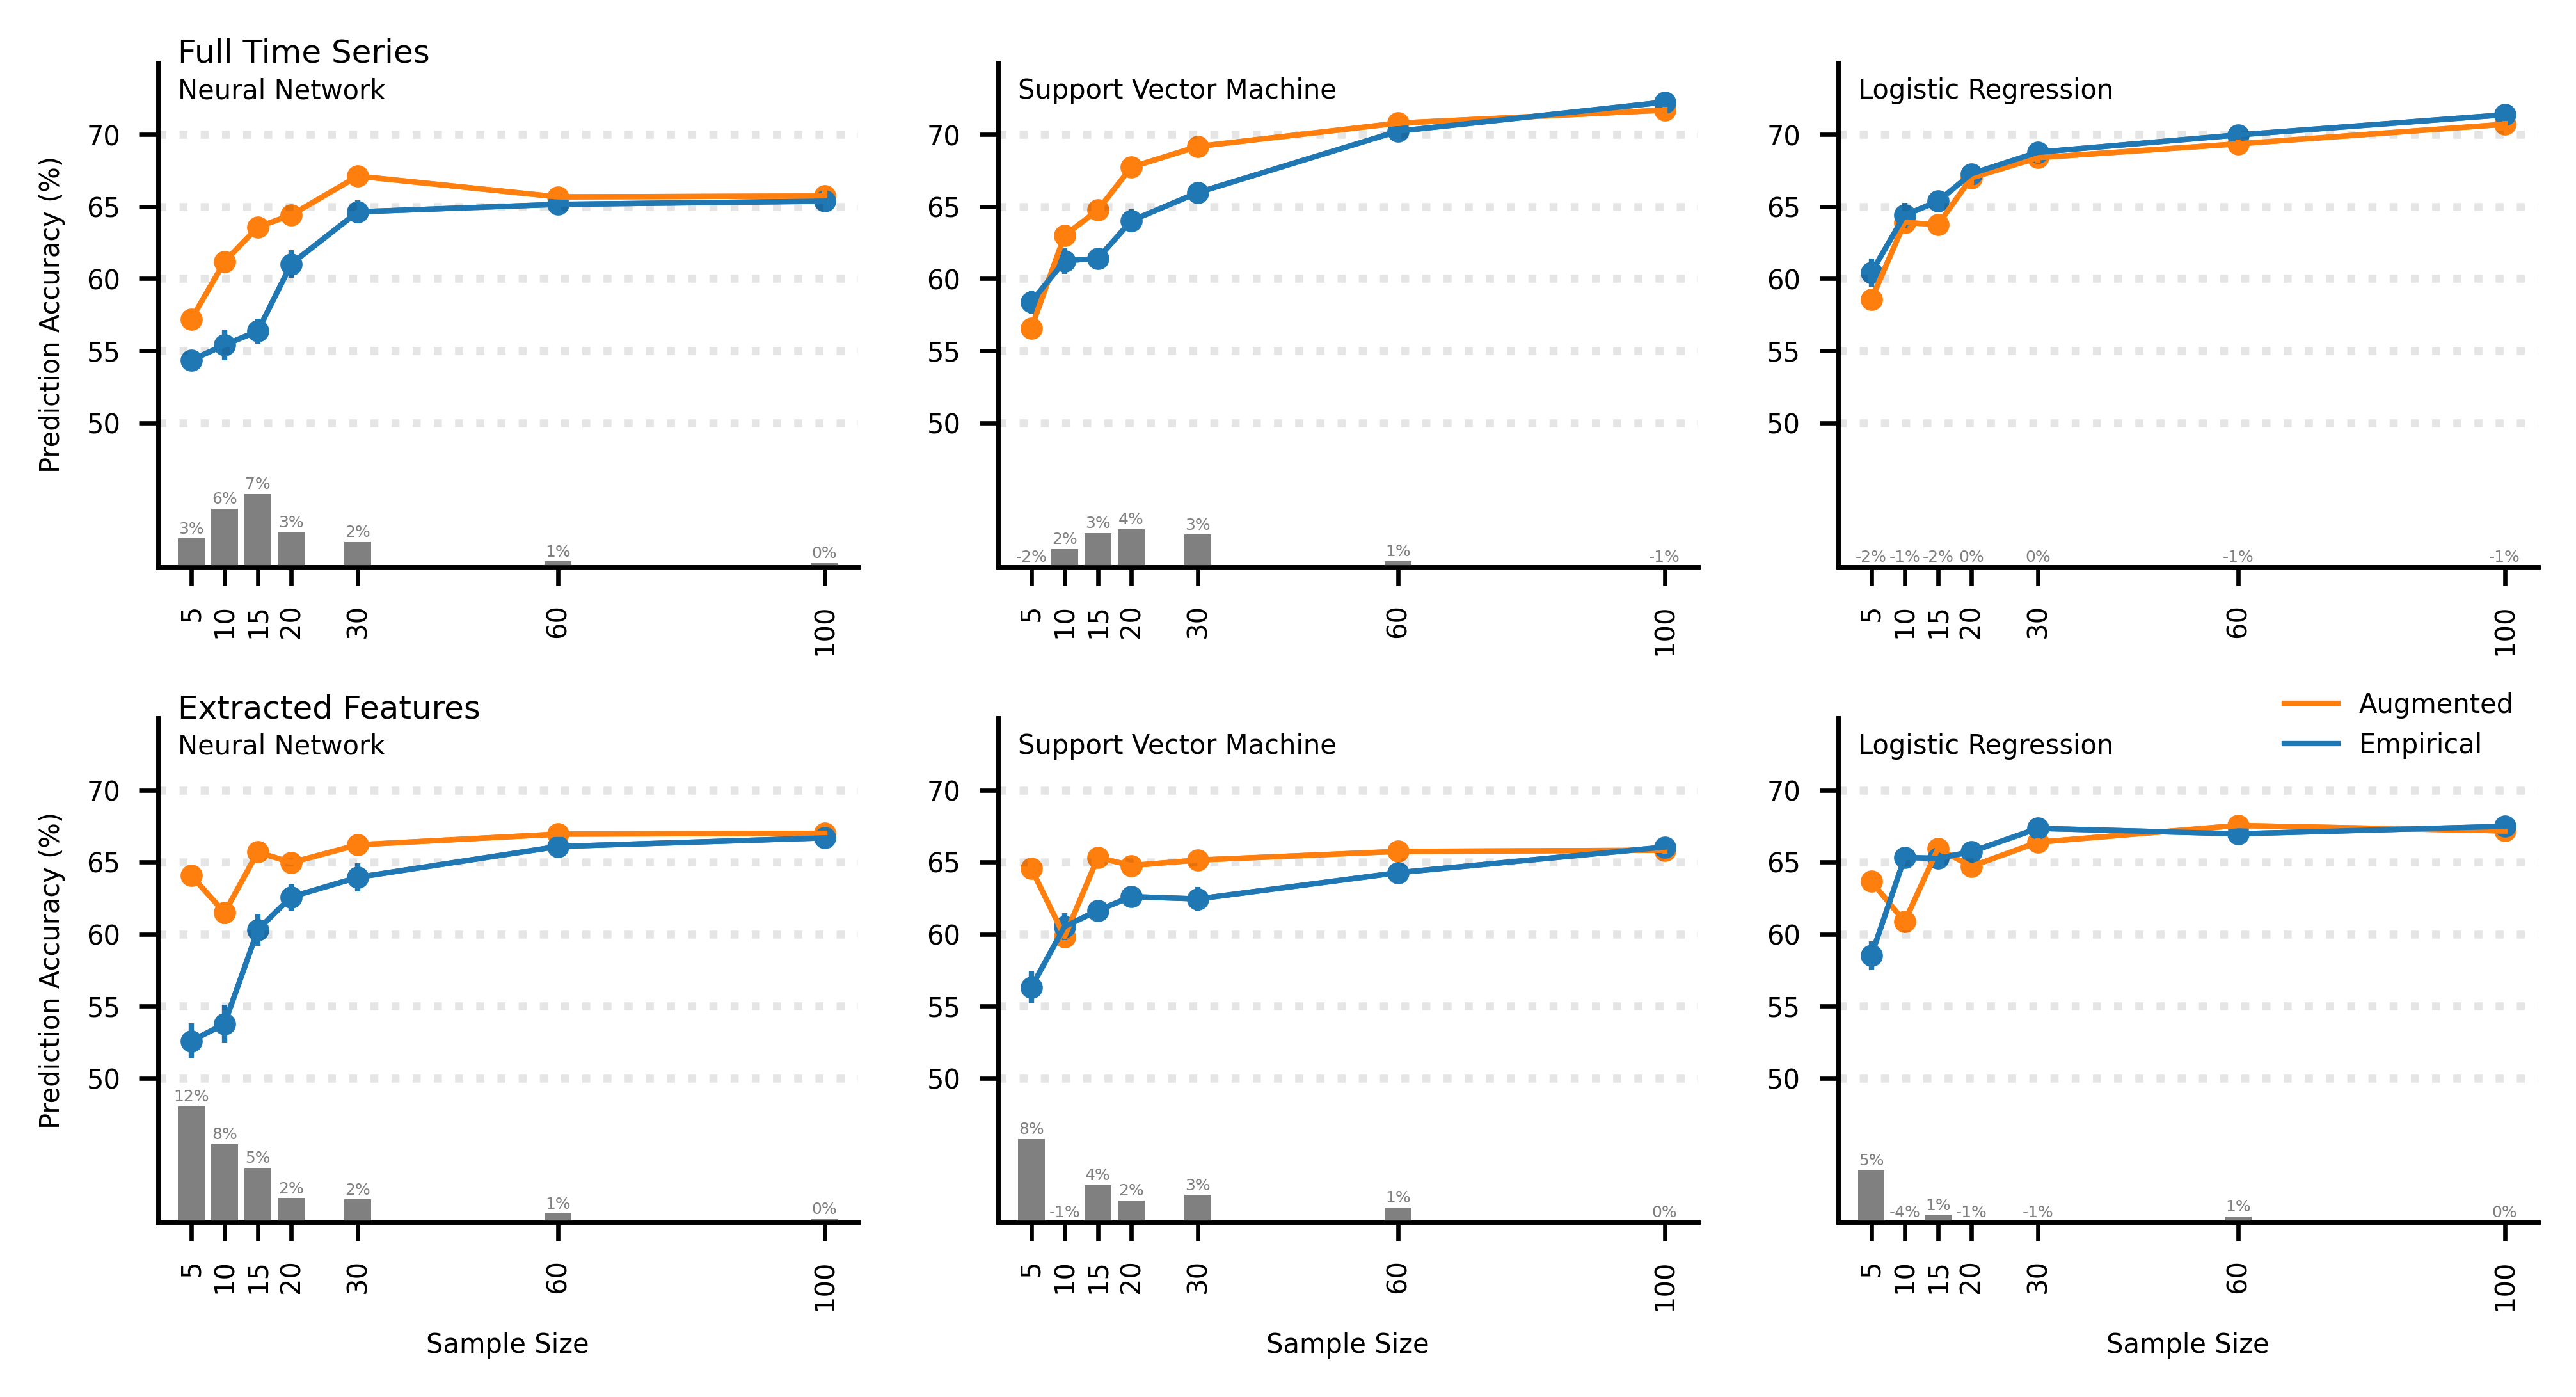

In [4]:
#import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
    
#xLabels = [5,10,15,20,30,40,50,60,80,100]
xLabels = [5,10,15,20,30,60,100]
data = np.arange(1,7)
#data = [1]

def retrieveData(data):   
    ##Full Time-Series
    if data == 1:
        augData = 'augmentedPredictions_NN_SynP050_Runs8000_Filtered_TestClassification.csv'
        empData = 'empiricalPredictions_NN_Runs8000_TestClassification.csv'
    if data == 2:
        augData = 'augmentedPredictions_SVM_SynP050_Runs8000_Filtered_TestClassification.csv'
        empData = 'empiricalPredictions_SVM_Runs8000_TestClassification.csv'
    if data == 3:
        augData = 'augmentedPredictions_LR_SynP050_Runs8000_Filtered_TestClassification.csv'
        empData = 'empiricalPredictions_LR_Runs8000_TestClassification.csv'

    ##Features
    if data == 4:
        augData = 'augmentedPredictions_NN_SynP050_Runs8000_Filtered_Features_TestClassification.csv'
        empData = 'empiricalPredictions_NN_Runs8000_Features_TestClassification.csv'
    if data == 5:
        augData = 'augmentedPredictions_SVM_SynP050_Runs8000_Filtered_Features_TestClassification.csv'
        empData = 'empiricalPredictions_SVM_Runs8000_Features_TestClassification.csv'
    if data == 6:  
        augData = 'augmentedPredictions_LR_SynP050_Runs8000_Filtered_Features_TestClassification.csv'
        empData = 'empiricalPredictions_LR_Runs8000_Features_TestClassification.csv'
        
    return empData, augData

def loadAndPlot(filename, plotColor, legendName):
    data = []
    with open(filename) as f:
        [data.append(line.split(',')[0:4]) for line in f.readlines()]
    data = np.asarray(data).astype(int)
    
    meanData = []
    semData = []
    for ss in np.unique(data[:,0]):
        ssIndex = data[:,0] == ss
        meanData.append(np.mean(data[ssIndex,3]))
        semData.append((np.std(data[ssIndex,3]))/np.sqrt(len(data[ssIndex,3]))) #SEM
        
    plt.plot(np.unique(data[:,0]),meanData, color = plotColor, linewidth = 1)
    plt.scatter(np.unique(data[:,0]),meanData,label='_nolegend_', color = plotColor, s = 10)
    plt.errorbar(np.unique(data[:,0]),meanData,semData,label='_nolegend_', color = plotColor, linewidth = 1)
        
    return legendName

def plotDiffData():
    nnDataDS = []
    with open(empData) as f:
        [nnDataDS.append(line.split(',')[0:4]) for line in f.readlines()]
    nnDataDS = np.asarray(nnDataDS).astype(int)

    nnDataDSSyn_SynP100 = []
    with open(augData) as f:
        [nnDataDSSyn_SynP100.append(line.split(',')[0:4]) for line in f.readlines()]
    nnDataDSSyn_SynP100 = np.asarray(nnDataDSSyn_SynP100).astype(int)

    meanDataDS = []
    for ss in np.unique(nnDataDS[:,0]):
        ssIndex = nnDataDS[:,0] == ss
        meanDataDS.append(np.mean(nnDataDS[ssIndex,3]))

    meanDataDSSyn_SynP100 = []
    for ss in np.unique(nnDataDSSyn_SynP100[:,0]):
        ssIndex = nnDataDSSyn_SynP100[:,0] == ss
        meanDataDSSyn_SynP100.append(np.mean(nnDataDSSyn_SynP100[ssIndex,3]))

    #meanDiff = [np.nan]*len(meanDataDS)
    meanDiff = []
    for ss in range(len(meanDataDSSyn_SynP100)):
        meanDiff.append(meanDataDSSyn_SynP100[ss]-meanDataDS[ss])
        
    ax2.bar(xLabels,meanDiff,color='grey',width=4)
    for i in range(len(meanDataDSSyn_SynP100)):
        if meanDiff[i] > 0:
            ax2.annotate(str(round(meanDiff[i]))+'%', (xLabels[i],meanDiff[i]+.5), ha='center', color='grey', size = 3)
        else:
            ax2.annotate(str(round(meanDiff[i]))+'%', (xLabels[i],.5), ha='center', color='grey', size = 3)   
    
    #for i in range(len(meanDataDSSyn_SynP100)):
    #    plt.plot([xLabels[i],xLabels[i]], [meanDataDS[i],meanDataDSSyn_SynP100[i]], linestyle="--", color="grey", alpha=.2, label='_nolegend_')
    #    if meanDiff[i] >= 3:
    #        ax1.annotate(str(round(meanDiff[i]))+'%', (xLabels[i]-2.5, np.mean([meanDataDS[i],meanDataDSSyn_SynP100[i]])),  ha='left', va='center', rotation=90, color='grey',alpha=.4)
    #    else:
    #        plt.plot([xLabels[i],xLabels[i]-2], [np.mean([meanDataDS[i],meanDataDSSyn_SynP100[i]]),np.mean([meanDataDS[i],meanDataDSSyn_SynP100[i]])+3], linestyle="--", color="grey", alpha=.2, label='_nolegend_')
    #        ax1.annotate(str(round(meanDiff[i]))+'%', (xLabels[i]-3.5, np.mean([meanDataDS[i],meanDataDSSyn_SynP100[i]])+4),  ha='left', va='center', rotation=90, color='grey',alpha=.4)
            
            
def formatPlot():
    axisLevels = np.arange(50,75,5)
    for y in axisLevels:
        plt.axhline(y=y, color='k', linestyle=':', alpha=.1)
    plt.ylim(50,75)
    plt.xlim(0,105)
    plt.xticks(xLabels)
    plt.legend(legendNames, loc='lower right')
    plt.ylabel('Prediction Accuracy (%)')
    plt.xlabel('Sample Size')
    
##########################################################
## Setup Figure
##########################################################

fig = plt.figure(figsize=(24, 4), dpi=600)
fig.subplots_adjust(hspace=.3)


##########################################################
## Plot Neural Network
##########################################################
for dat in data:
    if len(data)>1:
        ax1 = plt.subplot(2,3,dat)
    else:
        ax1 = plt.subplot(1,1,1)
    legendNames = []
    empData, augData = retrieveData(dat)
    legendNames.append(loadAndPlot(augData,'#ff7f0e','Augmented'))
    legendNames.append(loadAndPlot(empData,'#1f77b4','Empirical'))

    axisLevels = np.arange(50,75,5)
    for y in axisLevels:
        plt.axhline(y=y, color='k', linestyle=':', alpha=.1)
    plt.ylim(40,75)
    plt.xlim(0,105)
    plt.xticks(xLabels)
    plt.yticks(np.arange(50,75,5))
    plt.rcParams.update({'font.size': 5})  
        
    if dat == data[-1]:
        plt.legend(legendNames, bbox_to_anchor=(1,1.1), frameon=False)
        
    if (dat == 1) | (dat == 4):
        plt.ylabel('Prediction Accuracy (%)')
        
    if dat > 3:    
        plt.xlabel('Sample Size')
    
    if dat == 1:
        ax1.annotate('Full Time Series',(3,75), fontsize = 6)
    elif dat == 4:
        ax1.annotate('Extracted Features',(3,75), fontsize = 6)
        
    if (dat == 1) | (dat == 4):
        ax1.annotate('Neural Network', (3,72.5), fontsize = 5)
    elif (dat == 2) | (dat == 5):
        ax1.annotate('Support Vector Machine', (3,72.5), fontsize = 5)
    else:
        ax1.annotate('Logistic Regression', (3,72.5), fontsize = 5)
  
    plt.xticks(rotation=90)
    ax1.spines[['right', 'top']].set_visible(False)

    ax2 = ax1.twinx()  
    plotDiffData()
    ax2.set_ylim(0,50)
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.set_yticks([])
    
##########################################################
## Save Plot
##########################################################
fig = plt.gcf()
fig.set_size_inches(8, 4)
fig.savefig('Figure 5. Classification.png', dpi=600, facecolor='white', edgecolor='none')
